In [ ]:
import nltk
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS

In [ ]:
np.random.seed(27)
sns.set_style('white')
warnings.filterwarnings('ignore')

In [ ]:
tweets =pd.read_csv("/content/processed_tweet_data.csv", encoding= 'unicode_escape')
tweets[:4000]

created_at                                             source  \
0     04-04-2020  <a href="http://twitter.com/download/iphone" r...   
1     04-04-2020  <a href="https://mobile.twitter.com" rel="nofo...   
2     04-04-2020  <a href="http://twitter.com/download/iphone" r...   
3     04-04-2020  <a href="https://mobile.twitter.com" rel="nofo...   
4     04-04-2020  <a href="http://twitter.com/download/android" ...   
...          ...                                                ...   
3995  04-04-2020  <a href="https://www.thekitchn.com/" rel="nofo...   
3996  04-04-2020  <a href="http://twitter.com/download/iphone" r...   
3997  04-04-2020  <a href="http://twitter.com/#!/download/ipad" ...   
3998  04-04-2020  <a href="http://twitter.com/download/android" ...   
3999  04-04-2020  <a href="http://twitter.com/download/iphone" r...   

                                          original_text  polarity  \
0     #Coronavirus precautions and safety measures !...  0.166667   
1     @narendramodi @BJP4India @sanjayjaiswalMP @PMO...  0.133333   
2     56% of new #CoronaVirus cases reported in Indi...  0.316667   
3     #COVID2019 #coronavirus #CoronavirusPandemic #...  0.086111   
4     #SmartValue donating food for needy in pochanp...  0.280000   
...                                                 ...       ...   
3995  Covid-19 has affected global and Indian market...  0.062500   
3996  @CMOMaharashtra @PawarSpeaks @MumbaiNCP @Offic...  0.000000   
3997  You can communalised election  riot  any hindu...  0.028125   
3998  Proud of our PM  Modi ji for extremely bold de...  0.337500   
3999  Love you tony @aboveandbeyond loving forever r...  0.000000   

      subjectivity lang  favorite_count  retweet_count original_author  \
0         0.188889   en             548            612     ketuesriche   
1         0.455556   en             195             92        Grid1949   
2         0.483333   en               2              1   LeeTomlinson8   
3         0.197222   en            1580            899         RIPNY08   
4         0.620000   en              72             20          pash22   
...            ...  ...             ...            ...             ...   
3995      0.500000   en               3              2    SyedaAnsari_   
3996      0.000000   en             570            450      mikenhoney   
3997      0.350000   en              28             18       amys_here   
3998      0.725000   en            1164            105      rgschwindt   
3999      0.000000   en               0              0      eastwind47   

      followers_count  friends_count possibly_sensitive  \
0                 551            351              False   
1                  66             92              False   
2                1195           1176                NaN   
3                2666           2704              False   
4               28250          30819                NaN   
...               ...            ...                ...   
3995              202            834              False   
3996               29            232              False   
3997             1390           1089              False   
3998             3294           4758              False   
3999               16             99                NaN   

                                               hashtags  \
0                                                    []   
1                                                    []   
2     [{'text': 'red4research', 'indices': [103, 116]}]   
3                                                    []   
4                                                    []   
...                                                 ...   
3995                                                 []   
3996                                                 []   
3997                                                 []   
3998         [{'text': 'COVID19', 'indices': [25, 33]}]   
3999                                                 []   

                 

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from clean_tweets_dataframe import Clean_Tweets

In [ ]:
ct = Clean_Tweets()

In [ ]:
print(f"Shape of tweets before droping duplicates tweets {tweets.shape}")
tweets = ct.drop_duplicate(tweets)
print(f"Shape of tweets after droping duplicates tweets {tweets.shape}")


Shape of tweets before droping duplicates tweets (4894, 15)
Shape of tweets after droping duplicates tweets (4881, 15)


In [ ]:
tweets = ct.remove_non_english_tweets(tweets)

In [ ]:
tweets.drop(['lang'], axis=1, inplace=True)

In [ ]:
tweets = ct.remove_links(tweets)

In [ ]:
tweets = ct.remove_special_characters(tweets)

In [ ]:
tweets.original_text[:3]

0    #Coronavirus precautions and safety measures  ...
1     narendramodi  BJP India  sanjayjaiswalMP  PMO...
2        of new #CoronaVirus cases reported in Indi...
Name: original_text, dtype: object

In [ ]:
tweets["hashtags"] = tweets["hashtags"].apply((lambda x: ct.get_element_from_json(x, 'text', '#')))
tweets["hashtags"][:3]

0                 []
1                 []
2    [#red4research]
Name: hashtags, dtype: object

In [ ]:
tweets["hashtags"] = tweets["hashtags"].apply(ct.array_to_string)
tweets["hashtags"][:10]

0                              
1                              
2                 #red4research
3                              
4                              
5    #WeCanDoThis, #WeCanDoThis
6                              
7                              
8                              
9                      #Covid19
Name: hashtags, dtype: object

In [ ]:
new_df = pd.DataFrame(columns=['hashtags'])
new_df['hashtags'] = tweets.original_text.apply(ct.find_hashtags)
new_df[:5]

hashtags
0  [#Coronavirus, #COVID, #IndiaFightsCorona, #lo...
1                                                 []
2                                     [#CoronaVirus]
3  [#COVID, #coronavirus, #CoronavirusPandemic, #...
4                                      [#SmartValue]

In [ ]:
tweets["hashtags_in_tweets"] = new_df["hashtags"].apply(ct.array_to_string)
tweets["hashtags_in_tweets"][:10]

0    #Coronavirus, #COVID, #IndiaFightsCorona, #loc...
1                                                     
2                                         #CoronaVirus
3    #COVID, #coronavirus, #CoronavirusPandemic, #L...
4                                          #SmartValue
5            #WHO, #Wuhan, #ChineseVirus, #coronavirus
6         #DefeatCoronaWithWillpower, #arundevganyadav
7                              #Tablighijammat, #Covid
8                                                     
9    #COVID, #FightAgainstCoronavirus, #ProudToBeIn...
Name: hashtags_in_tweets, dtype: object

In [ ]:
tweets["screen_name"] = tweets["user_mentions"].apply(
    (lambda x: ct.get_element_from_json(x, 'screen_name', "@",)))
tweets["screen_name"][:3]

0       [@TelGlobalHealth, @TelGlobalHealth]
1                          [@globalhlthtwit]
2    [@NHSRDForum, @NHSRDForum, @NHSRDForum]
Name: screen_name, dtype: object

In [ ]:
tweets["screen_name"] = tweets["screen_name"].apply(ct.array_to_string)
tweets["screen_name"][:3]


0       @TelGlobalHealth, @TelGlobalHealth
1                          @globalhlthtwit
2    @NHSRDForum, @NHSRDForum, @NHSRDForum
Name: screen_name, dtype: object

Screan names are usernames that are mentiond in original_text

In [ ]:
tweets["device"] = tweets["source"].apply(ct.get_device_name)
tweets["device"][:3]

0    Twitter for iPhone
1       Twitter Web App
2    Twitter for iPhone
Name: device, dtype: object

In [ ]:
tweets.drop(['source'], axis=1, inplace=True)

### Turn all the text to lowercase


In [ ]:
tweets = ct.to_lower(tweets)

### Missing values

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4881 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          4881 non-null   object 
 1   original_text       4881 non-null   object 
 2   polarity            4881 non-null   float64
 3   subjectivity        4881 non-null   float64
 4   favorite_count      4881 non-null   int64  
 5   retweet_count       4881 non-null   int64  
 6   original_author     4881 non-null   object 
 7   followers_count     4881 non-null   int64  
 8   friends_count       4881 non-null   int64  
 9   possibly_sensitive  2763 non-null   object 
 10  hashtags            4881 non-null   object 
 11  user_mentions       4881 non-null   object 
 12  place               3100 non-null   object 
 13  hashtags_in_tweets  4881 non-null   object 
 14  screen_name         4881 non-null   object 
 15  device              4881 non-null   object 
dtypes: flo

In [ ]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value: {}".format( tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 3899
Columons having columns value: Index(['possibly_sensitive', 'place'], dtype='object')


In [ ]:
tweets["possibly_sensitive"].fillna(False, inplace=True) # assume its not sensative
tweets["place"].fillna(" ", inplace=True)

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4881 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          4881 non-null   object 
 1   original_text       4881 non-null   object 
 2   polarity            4881 non-null   float64
 3   subjectivity        4881 non-null   float64
 4   favorite_count      4881 non-null   int64  
 5   retweet_count       4881 non-null   int64  
 6   original_author     4881 non-null   object 
 7   followers_count     4881 non-null   int64  
 8   friends_count       4881 non-null   int64  
 9   possibly_sensitive  4881 non-null   bool   
 10  hashtags            4881 non-null   object 
 11  user_mentions       4881 non-null   object 
 12  place               4881 non-null   object 
 13  hashtags_in_tweets  4881 non-null   object 
 14  screen_name         4881 non-null   object 
 15  device              4881 non-null   object 
dtypes: boo

In [ ]:
tweets = ct.convert_to_string(tweets)

In [ ]:
print(f"The first row created time before conversion {tweets.created_at[0]}")
tweets = ct.convert_to_datetime(tweets)
print(f"The first row created time after conversion {tweets.created_at[0]}")

The first row created time before conversion 04-04-2020
The first row created time after conversion 2020-04-04 00:00:00


In [ ]:
tweets = ct.convert_to_numbers(tweets)

In [ ]:
tweets = ct.convert_to_boolean(tweets)

In [ ]:
tweets = ct.convert_to_numbers(tweets)

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4881 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_at          4881 non-null   datetime64[ns]
 1   original_text       4881 non-null   string        
 2   polarity            4881 non-null   float64       
 3   subjectivity        4881 non-null   float64       
 4   favorite_count      4881 non-null   int64         
 5   retweet_count       4881 non-null   int64         
 6   original_author     4881 non-null   string        
 7   followers_count     4881 non-null   int64         
 8   friends_count       4881 non-null   int64         
 9   possibly_sensitive  4881 non-null   bool          
 10  hashtags            4881 non-null   string        
 11  user_mentions       4881 non-null   object        
 12  place               4881 non-null   string        
 13  hashtags_in_tweets  4881 non-null   string      

In [ ]:
tweets.to_csv(r'clean_tweets.csv', index=False, header=True)

In [ ]:
tweets = pd.read_csv("clean_tweets.csv")

In [ ]:
print('Count of columns in the data is:  ', len(tweets.columns))
print('Count of rows in the data is:  ', len(tweets))

Count of columns in the data is:   16
Count of rows in the data is:   4881


Most tweets were from mobile device.

### Tweet sentiments

In [ ]:
tweets["score"] = tweets["polarity"].apply(ct.polarity_category)
tweets.groupby("score")["polarity"].count()
tweets

created_at                                      original_text  \
0     2020-04-04  #coronavirus precautions and safety measures  ...   
1     2020-04-04   narendramodi  bjp india  sanjayjaiswalmp  pmo...   
2     2020-04-04      of new #coronavirus cases reported in indi...   
3     2020-04-04  #covid     #coronavirus #coronaviruspandemic #...   
4     2020-04-04  #smartvalue donating food for needy in pochanp...   
...          ...                                                ...   
4876  2020-04-04  this is the best    lock down cricket   shashi...   
4877  2020-04-04  my son        waits for modiji speeches  follo...   
4878  2020-04-04  sir in our colony dehradun  shamshergarh peopl...   
4879  2020-04-04  meanwhile in dehradun  uttarakhand  india  ele...   
4880  2020-04-04  thank you ongc  my wife usha mishra is diabete...   

          polarity  subjectivity  favorite_count  retweet_count  \
0     1.666667e-01      0.188889             548            612   
1     1.333333e-01      0.455556             195             92   
2     3.166667e-01      0.483333               2              1   
3     8.611111e-02      0.197222            1580            899   
4     2.800000e-01      0.620000              72             20   
...            ...           ...             ...            ...   
4876 -9.285714e-02      0.514286               0              0   
4877  3.700000e-17      0.633333             603            395   
4878  0.000000e+00      0.500000              18              4   
4879  0.000000e+00      0.000000              32             12   
4880  5.083333e-01      0.783333            1040            332   

     original_author  followers_count  friends_count  possibly_sensitive  \
0        ketuesriche              551            351               False   
1           grid1949               66             92               False   
2      leetomlinson8             1195           1176               False   
3            ripny08             2666           2704               False   
4             pash22            28250          30819               False   
...              ...              ...            ...                 ...   
4876    catew_mwangi              378           1295               False   
4877     lesleygale2              423            531               False   
4878     animuathiei             2393            259               False   
4879   taiwanculture              743            645               False   
4880      nursetexas             2796           4979               False   

                        hashtags  \
0                                  
1                                  
2                  #red4research   
3                                  
4                                  
...                          ...   
4876                      #covid   
4877                               
4878                               
4879                               
4880  #wecandothis, #wecandothis   

                                          user_mentions                 place  \
0     [{'screen_name': 'TelGlobalHealth', 'name': 'T...                  mass   
1     [{'screen_name': 'globalhlthtwit', 'name': 'An...   edinburgh, scotland   
2     [{'screen_name': 'NHSRDForum', 'name': 'NHS R&...                         
3     [{'screen_name': 'HighWireTalk', 'name': 'The ...                         
4     [{'screen_name': 'PeterHotez', 'name': 'Prof P...        united kingdom   
...                                                 ...                   ...   
4876                                                 []        nairobi, kenya   
4877  [{'screen_name': 'RealJoelSmalley', 'name': 'J...                         
4878  [{'screen_name': 'GermanyInAfrica', 'name': 'G...                         
4879  [{'screen_name': 'WilliamYang120', 'name': 'Wi...                         
4880  [{'screen_name': 'CDCDirector', 'name': 'Roche...  houston, tx âburbs   

                             

In [ ]:
tweets["score"] = tweets["polarity"].apply(ct.polarity_category)
tweets.groupby("score")["polarity"].count()

score
negative     892
neutral     1360
positive    2629
Name: polarity, dtype: int64

We can observe positive tweets are more retweeted, liked and people with more followers and friends had made a positive tweet about covid 19.

### Hashtags

In [ ]:
tweets_df = pd.DataFrame(columns=['hashtags', 'hashtags_in_tweets'])
tweets_df['hashtags'] = tweets['hashtags'].apply(ct.string_to_array)
tweets_df['hashtags_in_tweets'] = tweets['hashtags_in_tweets'].apply(
    ct.string_to_array)
tweets_df[:4]

hashtags                                 hashtags_in_tweets
0             None  [#coronavirus, #covid, #indiafightscorona, #lo...
1             None                                               None
2  [#red4research]                                     [#coronavirus]
3             None  [#covid, #coronavirus, #coronaviruspandemic, #...

In [ ]:
tweets_df.dropna(inplace=True)
tweets_df[:4]

hashtags  \
2                [#red4research]   
5   [#wecandothis, #wecandothis]   
9                     [#covid19]   
10  [#wecandothis, #wecandothis]   

                                   hashtags_in_tweets  
2                                      [#coronavirus]  
5         [#who, #wuhan, #chinesevirus, #coronavirus]  
9   [#covid, #fightagainstcoronavirus, #proudtobei...  
10                                           [#covid]

### screen_names

In [ ]:
tweets_df.dropna(inplace=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 2 to 4871
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hashtags            1106 non-null   object
 1   hashtags_in_tweets  1106 non-null   object
dtypes: object(2)
memory usage: 25.9+ KB


## Visualisations

In [ ]:
tweets["score"] = tweets["polarity"].apply(ct.polarity_category)

In [ ]:
df = tweets.copy(deep=True)
df['hashtags_in_tweets'] = df['hashtags_in_tweets'].apply(ct.string_to_array)
df.dropna(inplace=True)
df = ct.get_flattened_dataframe(df, 'hashtags_in_tweets', 'score')
df = df.groupby(['hashtags_in_tweets', 'score']  ).size().reset_index(name='counts')
px.histogram(df.nlargest(20, "counts"),
             x="hashtags_in_tweets", y="counts", color="score")

### words cloud for positive tweets

In [ ]:
tweets['clean_text'] = tweets['original_text'].astype(str)
tweets['clean_text'] = tweets['clean_text'].apply( lambda x: x.lower())
positive_tweets = tweets[tweets['score'] == 'positive']

In [ ]:
custom_stopwords = ['t', 'rt', 'ti', 'vk', 'to', 'co',
                    'dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd']
STOP_WORDS = STOPWORDS.union(custom_stopwords)

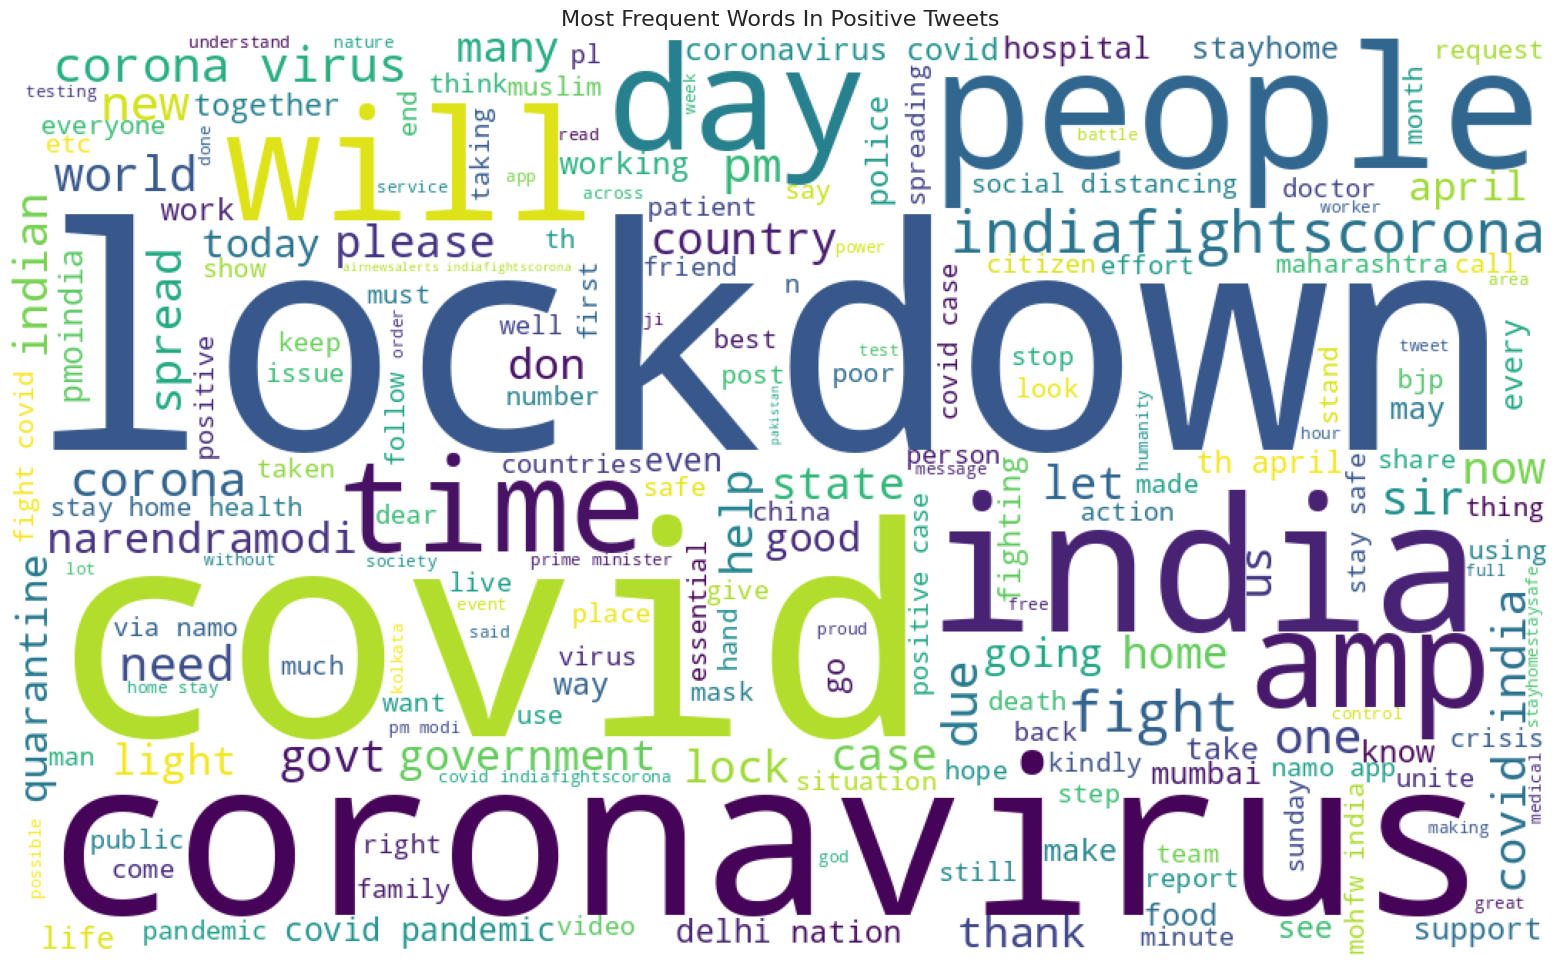

In [ ]:
plt.figure(figsize=(20, 12))

plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(positive_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Positive Tweets', fontsize=16)
plt.show()


### words cloud for negative tweets

In [ ]:
negative_tweets = tweets[tweets['score'] == 'negative']

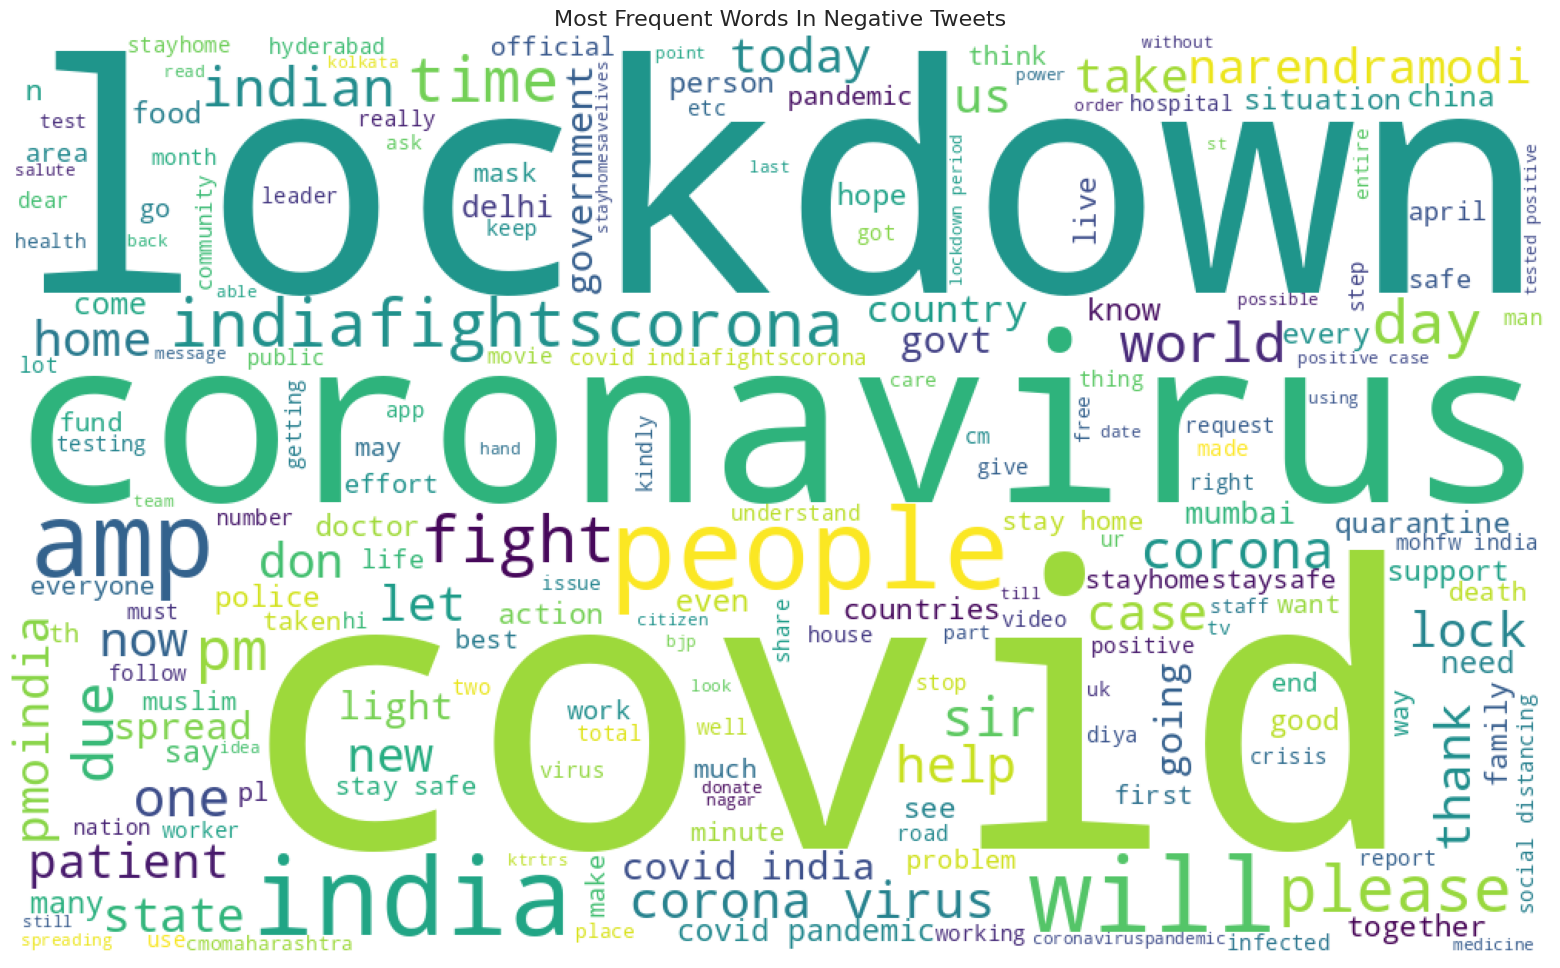

In [ ]:
plt.figure(figsize=(20, 12))
plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(negative_tweets.clean_text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Negative Tweets', fontsize=16)
plt.show()


### words cloud for neutral tweets

In [ ]:
neutral_tweets = tweets[tweets['score'] == 'neutral']

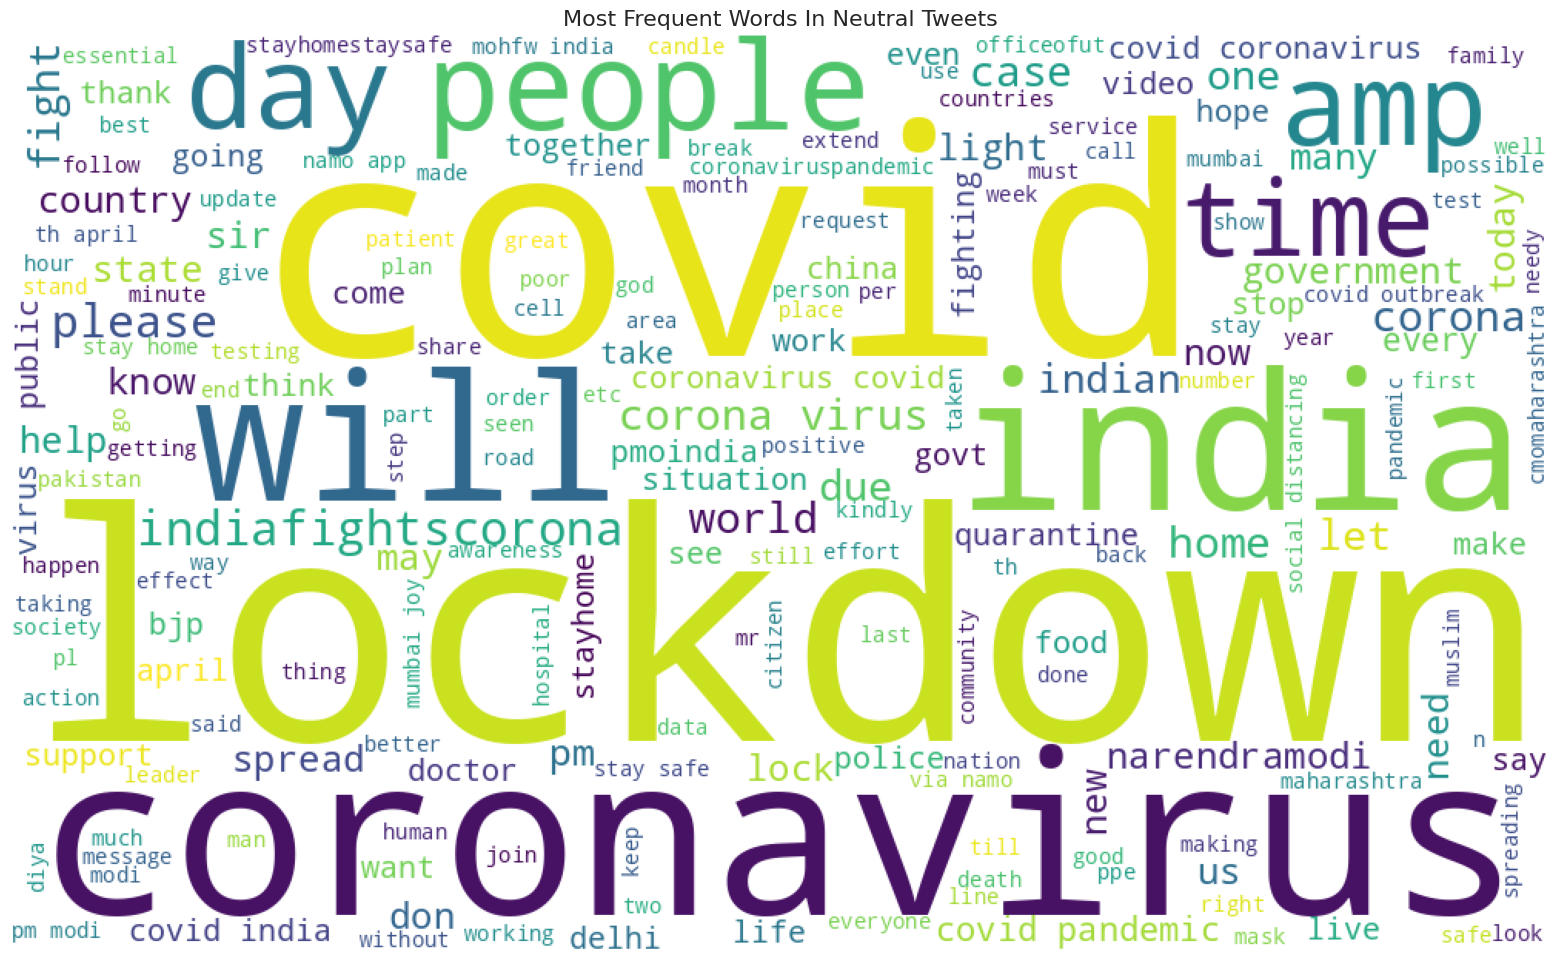

In [ ]:
plt.figure(figsize=(20, 12))
plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(neutral_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Neutral Tweets', fontsize=16)
plt.show()


### Word Cloud for all tweets

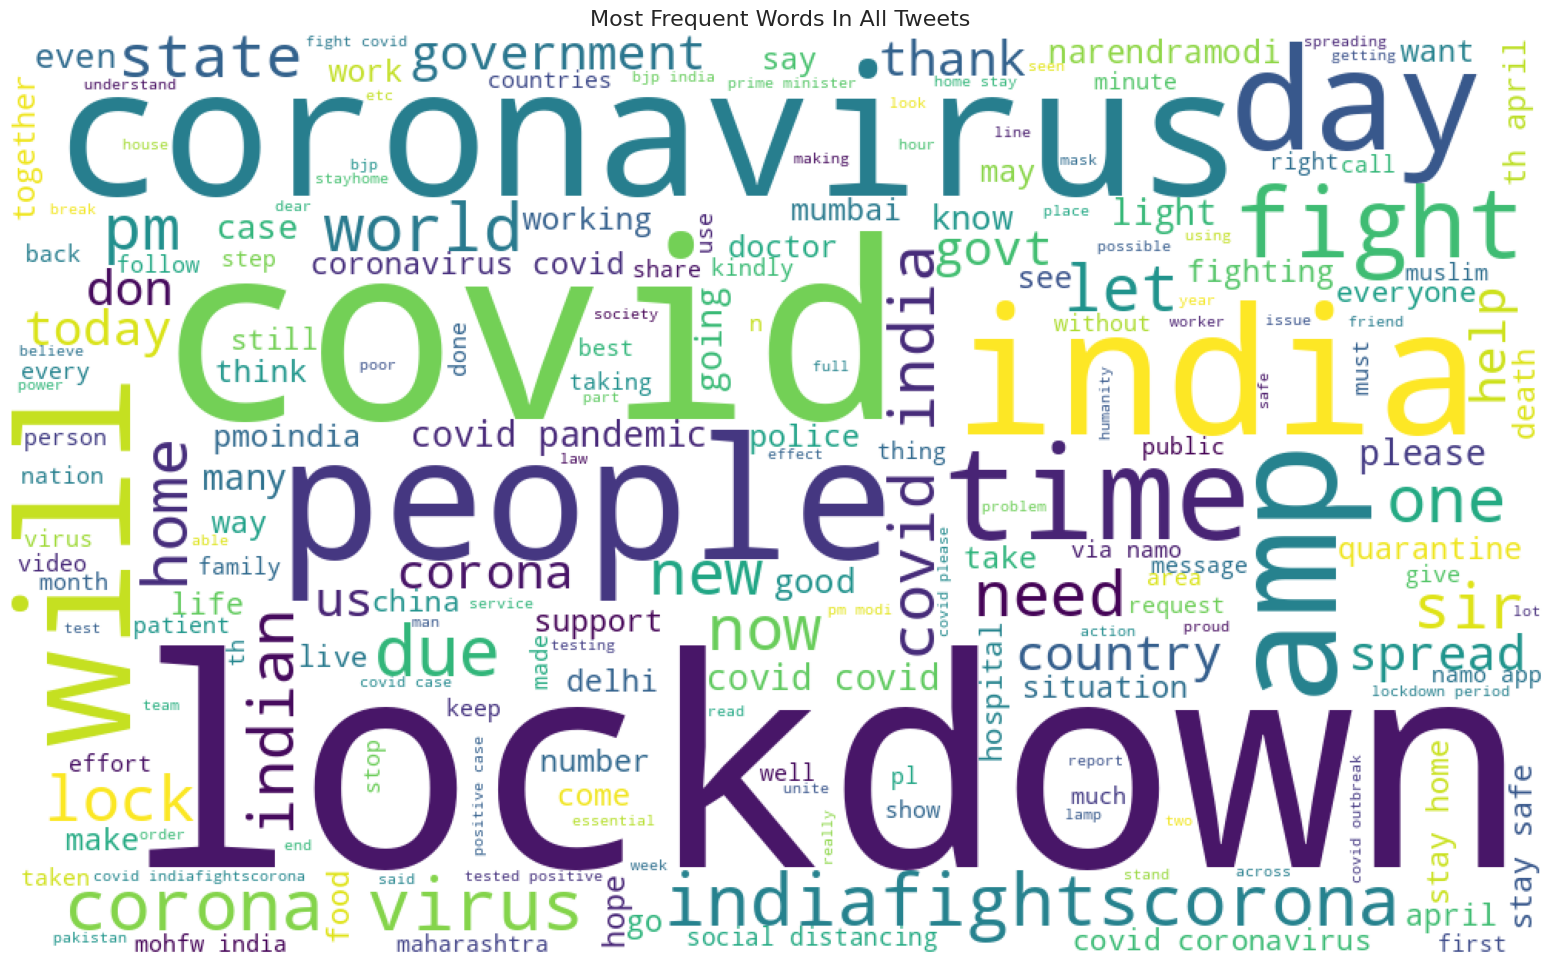

In [ ]:
plt.figure(figsize=(20, 12))
plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In All Tweets', fontsize=16)
plt.show()
